In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [63]:
df = pd.read_csv('../cleaned_data/master.csv',index_col=0)
df.head()

,nonglu_price,hommali_price,agri_prod_index,crops_prod_index,paddy_prod_index,nonglu_prod_index,hommali_prod_index,agri_price_index,crops_price_index,paddy_price_index,...,water_station_M7,water_station_N1,water_station_N67,water_station_Ny1B,water_station_P1,water_station_P17,water_station_S4B,water_station_Sw5A,water_station_Y17,water_station_Y1C
date,,,,,,,,,,,,,,,,,,,,,
2006-01-01 00:00:00,6696.0,7628.0,109.703894,114.011647,43.580672,72.649707,8.077559,110.377654,113.821771,100.581118,...,140.50,66.17,520.00,26.85,38.96,679.63,6.23,97.92,1.24,20.25
2006-02-01 00:00:00,6633.0,7873.0,93.049409,91.755084,46.062229,85.832560,0.000000,111.337228,115.390439,101.563145,...,87.75,39.02,501.32,26.22,64.11,573.91,4.69,69.55,0.00,13.07
2006-03-01 00:00:00,6649.0,7960.0,92.803780,87.828340,74.516499,138.854375,0.000000,112.498075,117.876876,103.063764,...,108.95,20.94,558.72,42.23,68.26,523.38,2.23,60.02,2.32,35.51
2006-04-01 00:00:00,6880.0,8028.0,75.452369,67.662286,66.215260,123.385807,0.000000,115.595159,121.878356,104.906097,...,188.40,45.73,692.79,61.08,84.68,508.65,0.06,76.80,5.84,31.54
2006-05-01 00:00:00,6782.0,8069.0,77.366260,68.992476,35.785484,66.682829,0.000000,113.408937,119.725058,104.687875,...,270.30,94.19,1027.25,44.98,146.19,1092.68,34.64,88.76,168.17,268.37


In [65]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [67]:
df.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01'],
              dtype='datetime64[ns]', name='date', length=226, freq=None)

In [69]:
# Length: 226 months of data
# Frequency: Monthly data (first of each month)
# Time span: ~18.75 years (Jan 2006 - Oct 2024)

In [71]:
df.head()

,nonglu_price,hommali_price,agri_prod_index,crops_prod_index,paddy_prod_index,nonglu_prod_index,hommali_prod_index,agri_price_index,crops_price_index,paddy_price_index,...,water_station_M7,water_station_N1,water_station_N67,water_station_Ny1B,water_station_P1,water_station_P17,water_station_S4B,water_station_Sw5A,water_station_Y17,water_station_Y1C
date,,,,,,,,,,,,,,,,,,,,,
2006-01-01,6696.0,7628.0,109.703894,114.011647,43.580672,72.649707,8.077559,110.377654,113.821771,100.581118,...,140.50,66.17,520.00,26.85,38.96,679.63,6.23,97.92,1.24,20.25
2006-02-01,6633.0,7873.0,93.049409,91.755084,46.062229,85.832560,0.000000,111.337228,115.390439,101.563145,...,87.75,39.02,501.32,26.22,64.11,573.91,4.69,69.55,0.00,13.07
2006-03-01,6649.0,7960.0,92.803780,87.828340,74.516499,138.854375,0.000000,112.498075,117.876876,103.063764,...,108.95,20.94,558.72,42.23,68.26,523.38,2.23,60.02,2.32,35.51
2006-04-01,6880.0,8028.0,75.452369,67.662286,66.215260,123.385807,0.000000,115.595159,121.878356,104.906097,...,188.40,45.73,692.79,61.08,84.68,508.65,0.06,76.80,5.84,31.54
2006-05-01,6782.0,8069.0,77.366260,68.992476,35.785484,66.682829,0.000000,113.408937,119.725058,104.687875,...,270.30,94.19,1027.25,44.98,146.19,1092.68,34.64,88.76,168.17,268.37


In [73]:
#df.info()
df.dtypes.value_counts()

float64    49
Name: count, dtype: int64

In [75]:
df.isnull().sum()[df.isnull().sum() != 0]

water_station_K10    3
water_station_S4B    1
dtype: int64

In [77]:
df.isna().sum()[df.isna().sum() != 0]

water_station_K10    3
water_station_S4B    1
dtype: int64

In [79]:
df.columns

Index(['nonglu_price', 'hommali_price', 'agri_prod_index', 'crops_prod_index',
       'paddy_prod_index', 'nonglu_prod_index', 'hommali_prod_index',
       'agri_price_index', 'crops_price_index', 'paddy_price_index',
       'nonglu_price_index', 'hommali_price_index', 'agri_export_value',
       'rice_export_value', 'ricet_export_amoun', 'cpi', 'cpi_rice',
       'pol_rate', 'neer', 'reer', 'sirikit_water', 'bhumibol_water',
       'fertilizer_1', 'fertilizer_2', 'fertilizer_3', 'fertilizer_4',
       'fertilizer_5', 'fertilizer_6', 'water_station_B10',
       'water_station_C13', 'water_station_C2', 'water_station_G8',
       'water_station_K10', 'water_station_K11A', 'water_station_Kgt3',
       'water_station_Kh103', 'water_station_Kh58A', 'water_station_Kh72',
       'water_station_M6A', 'water_station_M7', 'water_station_N1',
       'water_station_N67', 'water_station_Ny1B', 'water_station_P1',
       'water_station_P17', 'water_station_S4B', 'water_station_Sw5A',
       'water_s

### Stationarity Check

In [82]:
result = adfuller(df['nonglu_price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -3.302824716654775
p-value: 0.014752680770463844
Critical Values:
   1%: -3.4604283689894815
   5%: -2.874768966942149
   10%: -2.57382076446281


In [84]:
# ADF Statistic = -3.303
# A highly negative value generally indicates evidence against the null hypothesis 
# (non-stationarity). However, the magnitude alone is not the only determinant; 
# the test's critical values must also be considered for confirmation.

# More negative than both the 5% (-2.875) and 10% (-2.574) critical values
# But not more negative than the 1% critical value (-3.460)
# This means one can reject the null hypothesis of non-stationarity at the 5% confidence level 
# (which we're using down below) but not at the 1% level (which is basically fine here)
# The p-value of 0.015 confirms this, as it's less than 0.05 but greater than 0.01

# p-value = 0.015
# This is less than the standard 0.05 significance level
# Therefore, we reject the null hypothesis of non-stationarity
# This output justifies rejecting the null hypothesis that the series is non-stationary.

## Model

In [87]:
# Set the frequency of the time series to quarterly
# ME-DEC means monthly data ending in December
#df = df.asfreq('ME')
#df = df.asfreq('MS')

In [89]:
# len(df.columns)
# len(xvars)

In [107]:
# Set dependent variable (target) as real GDP
# y = df['nonglu_price']
# non-glutinous rice price 

# Test differencing 
# Create the differenced target
y = df['nonglu_price'].diff().dropna()

# Define independent variables (predictors) list
xvars = ['hommali_price', 'agri_prod_index', 'crops_prod_index',
        'paddy_prod_index', 'nonglu_prod_index', 'hommali_prod_index',
       'agri_price_index', 'crops_price_index', 'paddy_price_index', 'agri_export_value',
       'rice_export_value', 'ricet_export_amoun', 'cpi', 'cpi_rice',
       'pol_rate', 'neer', 'reer', 'sirikit_water', 'bhumibol_water',
       'fertilizer_1', 'fertilizer_2', 'fertilizer_3', 'fertilizer_4',
       'fertilizer_5', 'fertilizer_6','water_station_B10',
       'water_station_C13', 'water_station_C2', 'water_station_G8',
       'water_station_K10', 'water_station_K11A', 'water_station_Kgt3',
       'water_station_Kh103', 'water_station_Kh58A', 'water_station_Kh72',
       'water_station_M6A', 'water_station_M7', 'water_station_N1',
       'water_station_N67', 'water_station_Ny1B', 'water_station_P1',
       'water_station_P17', 'water_station_S4B', 'water_station_Sw5A',
       'water_station_Y17', 'water_station_Y1C']

# Create feature matrix X using selected variables
# X = df[xvars]

# Adjust X to match the same periods
# Remove the first row to match diff_data
X = df[xvars].iloc[1:]

# Split data into training and test sets
# shuffle=False maintains time order (crucial for time series!)
# test_size=20 reserves last 20 observations for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=20)

In [109]:
# Fit an ARIMA model with exogenous variables (also called ARIMAX)
gls = ARIMA(
    y_train,           # Dependent variable (non)
    exog=X_train,      # External variables (consumption, investment, etc.)
    order=(2, 1, 2),   # ARIMA parameters: (p=2, d=1, q=2)
    freq='MS'          # Monthly data 
).fit()

MissingDataError: exog contains inf or nans

In [ ]:
# Reason for User Warning:
# The ADF test showed stationarity at the 5% level,
# the model fitting process is being conservative and defaulting to 
# zeros as starting parameters for safety. 

# Often happens when, the time series is close to being non-stationary 
# (which matches the ADF test output - stationary at 5% but not at 1%) 
# and the initial parameter estimates would produce an unstable model.

# So, we could choose to difference up above when setting up the y

In [112]:
gls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           nonglu_price   No. Observations:                  205
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1487.409
Date:                Wed, 11 Dec 2024   AIC                           3034.818
Time:                        12:27:19   BIC                           3134.361
Sample:                    02-01-2006   HQIC                          3075.085
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
hommali_price         -0.4797      0.079     -6.070      0.000      -0.635      -0.325
agri_prod_index       -1.4355     18.692     -0.077      0.939     -38.071      35.200
crops_prod_index       2.1531     13.660      0.158      0.875     -24.621      28.927
paddy_prod_index       3.2019      3.759      0.852      0.394      -4.165      10.569
nonglu_prod_index     -2.0989      2.349     -0.894      0.372      -6.702       2.505
hommali_prod_index    -1.2358      1.390     -0.889      0.374      -3.961       1.489
agri_price_index     -12.1375     41.332     -0.294      0.769     -93.147      68.872
crops_price_index     22.7138     30.481      0.745      0.456     -37.027      82.455
paddy_price_index     83.5090      8.988      9.291      0.000      65.892     101.126
agri_export_value      0.0356      0.206      0.173      0.863      -0.368       0.439
rice_export_value     -5.1267      1.059     -4.842      0.000      -7.202      -3.051
ricet_export_amoun     0.0024      0.000      5.053      0.000       0.001       0.003
cpi                  -29.9861     99.859     -0.300      0.764    -225.706     165.734
cpi_rice             -39.6933     24.408     -1.626      0.104     -87.532       8.145
pol_rate              38.0082    219.569      0.173      0.863    -392.339     468.355
neer                 -76.9172    111.396     -0.690      0.490    -295.250     141.415
reer                  82.2444    116.404      0.707      0.480    -145.903     310.392
sirikit_water         -0.0488      0.077     -0.637      0.524      -0.199       0.102
bhumibol_water         0.0176      0.068      0.260      0.795      -0.115       0.151
fertilizer_1           0.0755      0.098      0.768      0.443      -0.117       0.268
fertilizer_2          -0.0755      0.081     -0.930      0.352      -0.235       0.084
fertilizer_3          -0.3052      0.093     -3.281      0.001      -0.488      -0.123
fertilizer_4           0.0288      0.069      0.415      0.678      -0.107       0.165
fertilizer_5           0.0684      0.097      0.707      0.479      -0.121       0.258
fertilizer_6           0.1789      0.059      3.045      0.002       0.064       0.294
ar.L1                  0.6957      0.958      0.726      0.468      -1.182       2.573
ar.L2                  0.1533      0.511      0.300      0.764      -0.849       1.155
ma.L1                 -0.8943      0.968     -0.924      0.355      -2.791       1.002
ma.L2                 -0.0088      0.634     -0.014      0.989      -1.251       1.234
sigma2              1.289e+05      0.224   5.76e+05      0.000    1.29e+05    1.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               163.42
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                            -0.58
Prob(H) (two-sided):              

In [114]:
# Generate predictions on the test set
preds = gls.predict(
   start=X_test.index[0],    # Start forecasting from first test observation
   end=X_test.index[-1],     # Continue until last test observation
   exog=X_test)

ValueError: Provided exogenous values are not of the appropriate shape. Required (20, 25), got (20, 46).

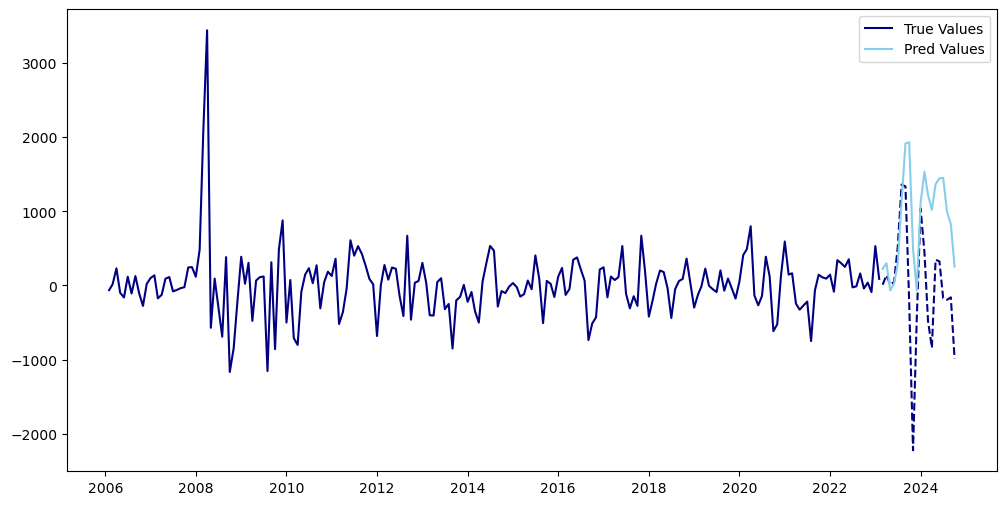

In [97]:
# Create a figure with specified size (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

# Plot training data in solid navy blue
plt.plot(y_train, c='navy', label='True Values')

# Plot test data in dashed navy blue (continuation of true values)
plt.plot(y_test, c='navy', linestyle='dashed')

# Plot predictions in light blue
plt.plot(preds, c='skyblue', label='Pred Values')

plt.legend()
plt.show()